In [1]:
%load_ext bigquery_magics

# "Will it snow tomorrow?" - The time traveler asked
The following dataset contains climate information from over 9000 stations accross the world. The overall goal of these subtasks will be to predict whether it will snow tomorrow 20 years ago. So if today is 1 April 2025 then the weather we want to forecast is for the 2 April 2005. You are supposed to solve the tasks using Big Query, which can be used in the Jupyter Notebook like it is shown in the following cell. For further information and how to use BigQuery in Jupyter Notebook refer to the Google Docs. 

The goal of this test is to test your coding knowledge in Python, BigQuery and Pandas as well as your understanding of Data Science. If you get stuck in the first part, you can use the replacement data provided in the second part.

In [2]:
%%bigquery --project coding-challenge-459917
SELECT
*,
FROM `bigquery-public-data.samples.gsod`
LIMIT 20 


Query is running:   0%|          |

Downloading:   0%|          |

,station_number,wban_number,year,month,day,mean_temp,num_mean_temp_samples,mean_dew_point,num_mean_dew_point_samples,mean_sealevel_pressure,...,min_temperature,min_temperature_explicit,total_precipitation,snow_depth,fog,rain,snow,hail,thunder,tornado
0,36010,99999,1929,12,6,49.500000,4,47.500000,4,983.200012,...,NaN,<NA>,NaN,NaN,False,False,False,False,False,False
1,36010,99999,1929,10,7,53.200001,4,49.099998,4,1002.299988,...,NaN,<NA>,NaN,NaN,False,False,False,False,False,False
2,38940,99999,1929,10,14,53.000000,4,50.700001,4,1030.699951,...,NaN,<NA>,0.00,NaN,False,False,False,False,False,False
3,33790,99999,1929,10,18,46.799999,4,41.500000,4,1009.200012,...,NaN,<NA>,0.00,NaN,False,False,False,False,False,False
4,30750,99999,1929,11,24,46.700001,4,43.200001,4,989.000000,...,NaN,<NA>,0.00,NaN,False,False,False,False,False,False
5,30050,99999,1929,12,1,45.700001,4,42.799999,4,991.599976,...,NaN,<NA>,NaN,NaN,False,False,False,False,False,False
6,38940,99999,1929,11,29,54.200001,4,51.799999,4,1001.000000,...,NaN,<NA>,NaN,NaN,False,False,False,False,False,False
7,33790,99999,1929,10,3,52.500000,4,39.299999,4,998.599976,...,NaN,<NA>,0.00,NaN,False,False,False,False,False,False
8,33110,99999,1929,10,28,52.200001,4,47.299999,4,1003.400024,...,NaN,<NA>,NaN,NaN,False,False,False,False,False,False
9,32620,99999,1929,11,3,44.599998,5,40.599998,4,1021.200012,...,NaN,<NA>,0.01,NaN,False,False,False,False,False,False


## Part 1

### 1. Task
Change the date format to 'YYYY-MM-DD' and select the data from 2000 till 2005 for station numbers including and between 725300 and 726300 , and save it as a pandas dataframe. Note the maximum year available is 2010. 

Here I am further filtering the table to select the records where
- year is between 2000 and 2005, and
- station numbers is between 725300 and 725330.

In [3]:
%%bigquery --project coding-challenge-459917
SELECT 
*,
FROM `bigquery-public-data.samples.gsod`
WHERE (year BETWEEN 2000 AND 2005)
  AND (station_number BETWEEN 725300 AND 726300)
LIMIT 20; 

Query is running:   0%|          |

Downloading:   0%|          |

,station_number,wban_number,year,month,day,mean_temp,num_mean_temp_samples,mean_dew_point,num_mean_dew_point_samples,mean_sealevel_pressure,...,min_temperature,min_temperature_explicit,total_precipitation,snow_depth,fog,rain,snow,hail,thunder,tornado
0,725868,99999,2000,4,7,37.900002,4,21.200001,4,NaN,...,NaN,<NA>,0.00,NaN,False,False,False,False,False,False
1,725835,99999,2000,1,10,47.299999,4,26.600000,4,NaN,...,NaN,<NA>,0.00,NaN,False,False,False,False,False,False
2,725786,99999,2000,6,11,69.800003,4,45.000000,4,NaN,...,NaN,<NA>,0.00,NaN,False,False,False,False,False,False
3,725827,99999,2000,9,6,44.200001,4,25.200001,4,1018.400024,...,NaN,<NA>,0.00,NaN,False,False,False,False,False,False
4,725827,99999,2000,11,7,17.100000,4,-7.200000,4,1019.400024,...,NaN,<NA>,0.00,NaN,False,False,False,False,False,False
5,725786,99999,2000,2,29,41.700001,5,33.400002,5,NaN,...,NaN,<NA>,0.00,NaN,False,False,False,False,False,False
6,725985,99999,2000,9,19,82.400002,5,55.799999,5,1014.000000,...,NaN,<NA>,0.00,NaN,False,False,False,False,False,False
7,725468,99999,2000,1,31,14.900000,6,9.200000,6,NaN,...,NaN,<NA>,0.00,NaN,False,False,False,False,False,False
8,726064,99999,2000,11,2,47.299999,6,29.600000,6,NaN,...,NaN,<NA>,0.00,NaN,False,False,False,False,False,False
9,725826,99999,2000,3,17,35.299999,6,30.200001,6,NaN,...,NaN,<NA>,NaN,NaN,False,False,False,False,False,False


### 2. Task 
From here you want to work with the data from all stations 725300 to 725330 that have information from 2000 till 2005. 

Here I am further filtering the table to select the records where
- year is between 2000 and 2005, and
- station numbers is between 725300 and 725330.

In [5]:
%%bigquery --project coding-challenge-459917
SELECT 
*,
FROM `bigquery-public-data.samples.gsod`
WHERE (year BETWEEN 2000 AND 2005)
  AND (station_number BETWEEN 725300 AND 725330)
LIMIT 20;

Query is running:   0%|          |

Downloading:   0%|          |

,station_number,wban_number,year,month,day,mean_temp,num_mean_temp_samples,mean_dew_point,num_mean_dew_point_samples,mean_sealevel_pressure,...,min_temperature,min_temperature_explicit,total_precipitation,snow_depth,fog,rain,snow,hail,thunder,tornado
0,725327,99999,2000,3,17,31.000000,21,20.900000,21,1028.300049,...,NaN,<NA>,0.00,NaN,False,False,False,False,False,False
1,725326,99999,2000,12,6,13.700000,22,2.400000,22,NaN,...,NaN,<NA>,0.00,NaN,False,False,False,False,False,False
2,725316,99999,2000,5,12,76.800003,23,69.400002,23,NaN,...,NaN,<NA>,NaN,NaN,False,False,False,False,False,False
3,725317,99999,2000,8,26,70.300003,23,66.400002,23,1013.200012,...,NaN,<NA>,0.13,NaN,False,False,False,False,False,False
4,725305,99999,2000,9,15,55.400002,23,41.799999,23,1019.700012,...,NaN,<NA>,0.02,NaN,False,False,False,False,False,False
5,725317,99999,2000,4,13,47.200001,23,29.299999,23,1026.099976,...,NaN,<NA>,0.00,NaN,False,False,False,False,False,False
6,725316,99999,2000,1,26,12.100000,24,4.400000,24,NaN,...,NaN,<NA>,0.00,NaN,False,False,False,False,False,False
7,725327,99999,2000,12,5,24.000000,24,11.700000,24,1023.500000,...,NaN,<NA>,0.00,NaN,False,False,False,False,False,False
8,725327,99999,2000,11,1,59.599998,24,39.500000,24,1020.000000,...,NaN,<NA>,0.00,NaN,False,False,False,False,False,False
9,725314,99999,2000,6,25,75.599998,24,67.699997,24,1014.200012,...,NaN,<NA>,0.56,NaN,False,False,False,False,False,False


Start by checking which year received the most snowfall in our data. 

To find the year that received the most snowfall across all stations:
- first group the data by year using the SQL clause `GROUP BY`, then
- count for number of distinct days it snowed using the clauses `COUNT` and `DISTINCT`

In [7]:
%%bigquery --project coding-challenge-459917
SELECT year, COUNT(DISTINCT DATE(year, month, day)) AS total_snowed
FROM `bigquery-public-data.samples.gsod`
WHERE snow = TRUE
GROUP BY year
ORDER BY total_snowed DESC;

Query is running:   0%|          |

Downloading:   0%|          |

,year,total_snowed
0,1936,366
1,1940,366
2,1944,366
3,1948,366
4,1952,366
...,...,...
77,1932,272
78,1931,254
79,1930,194
80,2010,105


According to the above solution, the year 1936 received the most snowfall. (However, I am somewhat skeptical about the total_snowed count. If I time permits, I plan to revisit this later.)

Add an additional field that indicates the daily change in snow depth measured at every station. And identify the station and day for which the snow depth increased the most.  

To calculate the daily change in snow depth at each station, we need to subtract the snow depth measured at each station on the previous day. This is achieved by using the function `LAG(...)` with `OVER (PARTITION BY ...)` to group by the station numbers and `ORDER BY` to currectly order the dates.

In [8]:
%%bigquery --project coding-challenge-459917
SELECT station_number, snow_depth,
 DATE(year, month, day) AS y_m_d,
 snow_depth - LAG(snow_depth) OVER (PARTITION BY station_number ORDER BY DATE(year, month, day)) AS diff
FROM `bigquery-public-data.samples.gsod`
ORDER BY diff DESC;


Query is running:   0%|          |

Downloading:   0%|          |

,station_number,snow_depth,y_m_d,diff
0,315320,117.300003,1995-04-21,116.100003
1,153450,117.300003,1992-02-28,115.700003
2,151600,117.300003,1991-02-20,114.900003
3,345100,110.199997,1989-02-03,108.199997
4,296120,109.400002,1993-10-31,107.400002
...,...,...,...,...
114420311,110510,NaN,2002-11-28,NaN
114420312,110510,NaN,2005-04-13,NaN
114420313,110510,NaN,2008-06-04,NaN
114420314,110510,NaN,2010-03-14,NaN


The highest increase in snow occured at the station 315320 on 1995-04-21.

Do further checks on the remaining dataset, clean or drop data depending on how you see appropriate. 

I will postpone the further checks and Task 3 (data splitting) to Part 2 using the provided csv file.

### 3. Task
Now it is time to split the data, into a training, evaluation and test set. As a reminder, the date we are trying to predict snow fall for should constitute your test set.

In [ ]:
import datetime as dt

str(dt.datetime.today()- dt.timedelta(days=20*365)).split(' ')[0]


## Part 2
If you made it up to here all by yourself, you can use your prepared dataset to train an algorithm of your choice to forecast whether it will snow on the following date for each station in this dataset:

In [9]:
import datetime as dt

str(dt.datetime.today()- dt.timedelta(days=20*365)).split(' ')[0]

'2005-05-21'

You are allowed to use any library you are comfortable with such as sklearn, tensorflow, keras etc. 
If you did not manage to finish part one feel free to use the data provided in 'coding_challenge.csv' Note that this data does not represent a solution to Part 1. 

### Snow Prediction

I am using the provided csv file for Part 2 of the coding challenge.

The goal of this project is to predict whether it will snow on the provided date above for each station the the dataset. 

The study below includes:
- Data cleaning: handling missing values and outliers,
- Feature engineering: transforming existing features, creating new features, encoding categorical features,
- Modelling: fitting, tuning and evaluating classification model(s) for snow prediction.

I plan to begin with a baseline Linear Regression model to predict snowfall. This will provide a simple, interpretable benchmark. If time permits, I will extend the analysis by comparing it with a more advanced model, such as XGBoost, to evaluate potential improvements.

#### Data cleaning

In [174]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import sklearn

In [125]:
# Load data
df = pd.read_csv('coding_challenge.csv', low_memory=False) # Set low_memory to be equal to False 
                                                           # as I got the warning that column 21 has mixed-type issues

# print first few records
display(df.head())                                                           

,date,station_number,wban_number,year,month,day,mean_temp,num_mean_temp_samples,mean_dew_point,num_mean_dew_point_samples,...,min_temperature,min_temperature_explicit,total_precipitation,snow_depth,fog,rain,snow,hail,thunder,tornado
0,2000-08-11,725327,99999,2000,8,11,75.000000,11,60.500000,11.0,...,NaN,NaN,0.00,NaN,False,False,False,False,False,False
1,2000-09-17,725316,99999,2000,9,17,62.400002,23,47.500000,23.0,...,NaN,NaN,0.00,NaN,False,False,False,False,False,False
2,2000-07-11,725316,99999,2000,7,11,76.800003,23,73.000000,23.0,...,NaN,NaN,NaN,NaN,False,False,False,False,False,False
3,2000-08-14,725305,99999,2000,8,14,74.099998,23,66.599998,23.0,...,NaN,NaN,0.01,NaN,False,False,False,False,False,False
4,2000-01-23,725317,99999,2000,1,23,25.299999,23,22.500000,23.0,...,NaN,NaN,0.00,NaN,True,True,True,True,True,True


In [126]:
# Check column info
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37415 entries, 0 to 37414
Data columns (total 32 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   date                                37415 non-null  object 
 1   station_number                      37415 non-null  int64  
 2   wban_number                         37415 non-null  int64  
 3   year                                37415 non-null  int64  
 4   month                               37415 non-null  int64  
 5   day                                 37415 non-null  int64  
 6   mean_temp                           37415 non-null  float64
 7   num_mean_temp_samples               37415 non-null  int64  
 8   mean_dew_point                      37406 non-null  float64
 9   num_mean_dew_point_samples          37406 non-null  float64
 10  mean_sealevel_pressure              33259 non-null  float64
 11  num_mean_sealevel_pressure_samples  33259

None

In [127]:
# Check missing values
display(df.isnull().sum())

date                                      0
station_number                            0
wban_number                               0
year                                      0
month                                     0
day                                       0
mean_temp                                 0
num_mean_temp_samples                     0
mean_dew_point                            9
num_mean_dew_point_samples                9
mean_sealevel_pressure                 4156
num_mean_sealevel_pressure_samples     4156
mean_station_pressure                 35530
num_mean_station_pressure_samples     35530
mean_visibility                          19
num_mean_visibility_samples              19
mean_wind_speed                          12
num_mean_wind_speed_samples              12
max_sustained_wind_speed                 17
max_gust_wind_speed                   15022
max_temperature                           3
max_temperature_explicit                  3
min_temperature                 

The columns `min_temperature` and `min_temperature_explicit` are empty. The columns `mean_station_pressure`, `num_mean_station_pressure_samples` and `snow_depth` contain only few records. 

I drop these columns as they do not add any information to the further analysis.

In [128]:
# Create a copy of the original df
snow_df = df.copy()

# Drop unwanted columns
snow_df = snow_df.drop(columns=['mean_station_pressure', 'num_mean_station_pressure_samples', 'min_temperature', 'min_temperature_explicit', 'snow_depth'])


In [129]:
# Check snow_df info
display(snow_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37415 entries, 0 to 37414
Data columns (total 27 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   date                                37415 non-null  object 
 1   station_number                      37415 non-null  int64  
 2   wban_number                         37415 non-null  int64  
 3   year                                37415 non-null  int64  
 4   month                               37415 non-null  int64  
 5   day                                 37415 non-null  int64  
 6   mean_temp                           37415 non-null  float64
 7   num_mean_temp_samples               37415 non-null  int64  
 8   mean_dew_point                      37406 non-null  float64
 9   num_mean_dew_point_samples          37406 non-null  float64
 10  mean_sealevel_pressure              33259 non-null  float64
 11  num_mean_sealevel_pressure_samples  33259

None

In [130]:
# Check missing values
display(snow_df.isnull().sum())


date                                      0
station_number                            0
wban_number                               0
year                                      0
month                                     0
day                                       0
mean_temp                                 0
num_mean_temp_samples                     0
mean_dew_point                            9
num_mean_dew_point_samples                9
mean_sealevel_pressure                 4156
num_mean_sealevel_pressure_samples     4156
mean_visibility                          19
num_mean_visibility_samples              19
mean_wind_speed                          12
num_mean_wind_speed_samples              12
max_sustained_wind_speed                 17
max_gust_wind_speed                   15022
max_temperature                           3
max_temperature_explicit                  3
total_precipitation                     448
fog                                       0
rain                            

In [131]:
# Check for duplicates
df.duplicated().sum()

np.int64(0)

There are no duplicates.

In [132]:
# Check whether the columns fog, rain, snow, hail, thunder, tornado are the same
for x in ['fog', 'rain', 'snow', 'hail', 'thunder', 'tornado']:
    print((snow_df['snow'] == snow_df[x]).all())


True
True
True
True
True
True


I only keep the target column `snow` for further analysis, as the other columns are redundant features and just copy of the target.

In [133]:
# Drop the columns fog, rain, hail, thunder and tornado
snow_df = snow_df.drop(columns=['fog', 'rain', 'hail', 'thunder', 'tornado'])

In [134]:
# Print first few columns
snow_df.head()

,date,station_number,wban_number,year,month,day,mean_temp,num_mean_temp_samples,mean_dew_point,num_mean_dew_point_samples,...,mean_visibility,num_mean_visibility_samples,mean_wind_speed,num_mean_wind_speed_samples,max_sustained_wind_speed,max_gust_wind_speed,max_temperature,max_temperature_explicit,total_precipitation,snow
0,2000-08-11,725327,99999,2000,8,11,75.000000,11,60.500000,11.0,...,10.0,11.0,7.7,11.0,11.1,NaN,71.599998,True,0.00,False
1,2000-09-17,725316,99999,2000,9,17,62.400002,23,47.500000,23.0,...,10.0,23.0,8.4,20.0,14.0,NaN,48.200001,True,0.00,False
2,2000-07-11,725316,99999,2000,7,11,76.800003,23,73.000000,23.0,...,8.4,23.0,6.0,21.0,12.0,NaN,71.599998,True,NaN,False
3,2000-08-14,725305,99999,2000,8,14,74.099998,23,66.599998,23.0,...,8.0,23.0,6.4,23.0,11.1,NaN,64.400002,True,0.01,False
4,2000-01-23,725317,99999,2000,1,23,25.299999,23,22.500000,23.0,...,3.9,23.0,8.2,23.0,15.0,NaN,17.600000,True,0.00,True


Now I want to check if I need to keep both columns `station_number` and `wban_number` (It might be that these IDs are somewhat redundant, as the station numbers can identify each station uniquely.)

In [135]:
# Number of unique stations
snow_df['station_number'].unique()

array([725327, 725316, 725305, 725317, 725326, 725314, 725320, 725315,
       725300, 725330])

In [136]:
# Number of unique wban_number
snow_df['wban_number'].unique()

array([99999, 14842, 94846, 14827,  4846,  4894, 53802, 94892,  3960,
        3887, 94870])

In [137]:
snow_df.groupby(['wban_number', 'station_number'])['station_number'].count()

wban_number  station_number
3887         725316             509
3960         725314             509
4846         725327             507
4894         725326             478
14827        725330            3756
14842        725320            3757
53802        725317             509
94846        725300            3755
94870        725315             509
94892        725305             509
99999        725305            3245
             725314            3223
             725315            3248
             725316            3243
             725317            3237
             725326            3234
             725327            3187
Name: station_number, dtype: int64

Some stations have different wban_number IDs. As our aim is to predict whether it will snow at each station, we need to identify each station uniquely. I will therefore combine the two IDs to create a single ID.

In [138]:
# Create a new column combining station_number and wban_number
snow_df['station_id'] = snow_df['station_number'].astype(str) + '_' + snow_df['wban_number'].astype(str)

In [139]:
# Check for unique values
snow_df['station_id'].unique()

array(['725327_99999', '725316_99999', '725305_99999', '725317_99999',
       '725326_99999', '725314_99999', '725320_14842', '725315_99999',
       '725300_94846', '725330_14827', '725327_4846', '725326_4894',
       '725317_53802', '725305_94892', '725314_3960', '725316_3887',
       '725315_94870'], dtype=object)

In [140]:
# Drop columns station_number and wban_number
snow_df = snow_df.drop(columns=['station_number', 'wban_number'])

In [141]:
# Type of station_id
snow_df['station_id'].dtype

dtype('O')

In [142]:
# Change datatype to Category for later use
snow_df['station_id'] = snow_df['station_id'].astype('category')

In [143]:
# Double checking the type 
snow_df['station_id'].dtype

CategoricalDtype(categories=['725300_94846', '725305_94892', '725305_99999',
                  '725314_3960', '725314_99999', '725315_94870',
                  '725315_99999', '725316_3887', '725316_99999',
                  '725317_53802', '725317_99999', '725320_14842',
                  '725326_4894', '725326_99999', '725327_4846', '725327_99999',
                  '725330_14827'],
, ordered=False, categories_dtype=object)

In [144]:
# Summary statistics
snow_df.describe()

,year,month,day,mean_temp,num_mean_temp_samples,mean_dew_point,num_mean_dew_point_samples,mean_sealevel_pressure,num_mean_sealevel_pressure_samples,mean_visibility,num_mean_visibility_samples,mean_wind_speed,num_mean_wind_speed_samples,max_sustained_wind_speed,max_gust_wind_speed,max_temperature,total_precipitation
count,37415.000000,37415.000000,37415.000000,37415.000000,37415.000000,37406.000000,37406.000000,33259.000000,33259.000000,37396.000000,37396.000000,37403.000000,37403.000000,37398.000000,22393.000000,37412.000000,36967.000000
mean,2004.650140,6.404544,15.693305,51.327756,23.477643,41.549799,23.459899,1017.250552,21.825671,8.643384,23.456038,7.662546,23.274523,14.042449,22.968079,41.880215,0.091325
std,2.975256,3.477842,8.799459,19.339455,1.931922,18.702883,1.963464,6.813199,3.127645,1.782814,1.970641,3.490000,2.267870,5.127463,6.199293,18.638009,0.274432
min,2000.000000,1.000000,1.000000,-16.200001,4.000000,-23.500000,4.000000,985.299988,4.000000,0.300000,4.000000,0.000000,4.000000,2.900000,11.100000,-34.599998,0.000000
25%,2002.000000,3.000000,8.000000,35.700001,24.000000,27.200001,24.000000,1013.099976,21.000000,7.800000,24.000000,5.100000,24.000000,9.900000,18.100000,28.400000,0.000000
50%,2005.000000,6.000000,16.000000,53.000000,24.000000,42.299999,24.000000,1017.099976,23.000000,9.500000,24.000000,7.200000,24.000000,13.000000,22.000000,42.799999,0.000000
75%,2007.000000,9.000000,23.000000,68.400002,24.000000,57.299999,24.000000,1021.400024,24.000000,10.000000,24.000000,9.700000,24.000000,16.900000,26.000000,57.200001,0.030000
max,2010.000000,12.000000,31.000000,100.400002,24.000000,79.099998,24.000000,1044.199951,24.000000,15.700000,24.000000,24.799999,24.000000,49.000000,63.900002,87.800003,9.990000


In [145]:
# Check for missing values
snow_df.isnull().sum()

date                                      0
year                                      0
month                                     0
day                                       0
mean_temp                                 0
num_mean_temp_samples                     0
mean_dew_point                            9
num_mean_dew_point_samples                9
mean_sealevel_pressure                 4156
num_mean_sealevel_pressure_samples     4156
mean_visibility                          19
num_mean_visibility_samples              19
mean_wind_speed                          12
num_mean_wind_speed_samples              12
max_sustained_wind_speed                 17
max_gust_wind_speed                   15022
max_temperature                           3
max_temperature_explicit                  3
total_precipitation                     448
snow                                      0
station_id                                0
dtype: int64

Now I want to omit the rows with missing values which contribute to less than 5% of the dataset, as it will not affect data significantly.

In [146]:
# 5% of records
thershold = len(snow_df)*0.05 
print(thershold)

1870.75


In [147]:
# Columns with less missing values less than the threshold
cols = ['mean_dew_point', 'num_mean_dew_point_samples', 'mean_visibility', 'num_mean_visibility_samples',
            'mean_wind_speed', 'num_mean_wind_speed_samples', 'max_sustained_wind_speed', 'max_temperature', 
            'max_temperature_explicit', 'total_precipitation']

In [148]:
# Drop rows 
snow_df = snow_df.dropna(subset=cols)

# Check missing values
snow_df.isna().sum()

date                                      0
year                                      0
month                                     0
day                                       0
mean_temp                                 0
num_mean_temp_samples                     0
mean_dew_point                            0
num_mean_dew_point_samples                0
mean_sealevel_pressure                 3994
num_mean_sealevel_pressure_samples     3994
mean_visibility                           0
num_mean_visibility_samples               0
mean_wind_speed                           0
num_mean_wind_speed_samples               0
max_sustained_wind_speed                  0
max_gust_wind_speed                   14816
max_temperature                           0
max_temperature_explicit                  0
total_precipitation                       0
snow                                      0
station_id                                0
dtype: int64

In [149]:
snow_df.head()

,date,year,month,day,mean_temp,num_mean_temp_samples,mean_dew_point,num_mean_dew_point_samples,mean_sealevel_pressure,num_mean_sealevel_pressure_samples,...,num_mean_visibility_samples,mean_wind_speed,num_mean_wind_speed_samples,max_sustained_wind_speed,max_gust_wind_speed,max_temperature,max_temperature_explicit,total_precipitation,snow,station_id
0,2000-08-11,2000,8,11,75.000000,11,60.500000,11.0,1020.500000,11.0,...,11.0,7.7,11.0,11.1,NaN,71.599998,True,0.00,False,725327_99999
1,2000-09-17,2000,9,17,62.400002,23,47.500000,23.0,NaN,NaN,...,23.0,8.4,20.0,14.0,NaN,48.200001,True,0.00,False,725316_99999
3,2000-08-14,2000,8,14,74.099998,23,66.599998,23.0,1016.400024,23.0,...,23.0,6.4,23.0,11.1,NaN,64.400002,True,0.01,False,725305_99999
4,2000-01-23,2000,1,23,25.299999,23,22.500000,23.0,1017.599976,23.0,...,23.0,8.2,23.0,15.0,NaN,17.600000,True,0.00,True,725317_99999
5,2000-07-17,2000,7,17,74.900002,24,62.500000,24.0,NaN,NaN,...,24.0,4.9,24.0,8.9,NaN,68.000000,True,0.00,False,725326_99999


The columns `mean_sealevel_pressure`, `num_mean_sealevel_pressure_samples` and `max_gust_wind_speed` still have missing values. Now I fill the remaing missing values using the values from the previous dates, measured at the respective station, hoping that weather data tends to follow a trend. 

In [152]:
# Set data type of date column to datetime
snow_df['date'] = pd.to_datetime(snow_df['date'])

# Sort the table by date
snow_df = snow_df.sort_values(['date']).reset_index(drop=True)

# Fill the missing values
snow_df = snow_df.sort_values('station_id').fillna(method='ffill')


/var/folders/61/_9df6py51j18dp2x9pbhz1s00000gn/T/ipykernel_23684/692486860.py:8: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  snow_df = snow_df.sort_values('station_id').fillna(method='ffill')
/var/folders/61/_9df6py51j18dp2x9pbhz1s00000gn/T/ipykernel_23684/692486860.py:8: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  snow_df = snow_df.sort_values('station_id').fillna(method='ffill')


In [153]:
# Check agian for the missing values
snow_df.isnull().sum()

date                                  0
year                                  0
month                                 0
day                                   0
mean_temp                             0
num_mean_temp_samples                 0
mean_dew_point                        0
num_mean_dew_point_samples            0
mean_sealevel_pressure                0
num_mean_sealevel_pressure_samples    0
mean_visibility                       0
num_mean_visibility_samples           0
mean_wind_speed                       0
num_mean_wind_speed_samples           0
max_sustained_wind_speed              0
max_gust_wind_speed                   1
max_temperature                       0
max_temperature_explicit              0
total_precipitation                   0
snow                                  0
station_id                            0
dtype: int64

There is still one more missing value in `max_gust_wind_speed` that could be that it is the first entry and not get filled by ffil. I simply omit this missing entry. 

In [156]:
# Drop the final missing value
snow_df = snow_df.dropna(subset=['max_gust_wind_speed'])

In [155]:
# Check agian for the missing values
snow_df.isnull().sum()

date                                  0
year                                  0
month                                 0
day                                   0
mean_temp                             0
num_mean_temp_samples                 0
mean_dew_point                        0
num_mean_dew_point_samples            0
mean_sealevel_pressure                0
num_mean_sealevel_pressure_samples    0
mean_visibility                       0
num_mean_visibility_samples           0
mean_wind_speed                       0
num_mean_wind_speed_samples           0
max_sustained_wind_speed              0
max_gust_wind_speed                   0
max_temperature                       0
max_temperature_explicit              0
total_precipitation                   0
snow                                  0
station_id                            0
dtype: int64

The data no longer contains any missing values. Due to lack of time, I will skip checking for outliers. If I have more time, I will create a distribution or box/violin plot using the Seaborn library to check for outliers in the numerical variables, such as mean_temp and mean_dew_point. I will skip this step and move on to feature engineering. I am aware that the existence of outliers may affect the performance of the model.

#### Feature engineering

I first check for data types that needs to be converted before modelling.

In [160]:
snow_df.dtypes

date                                  datetime64[ns]
year                                           int64
month                                          int64
day                                            int64
mean_temp                                    float64
num_mean_temp_samples                          int64
mean_dew_point                               float64
num_mean_dew_point_samples                   float64
mean_sealevel_pressure                       float64
num_mean_sealevel_pressure_samples           float64
mean_visibility                              float64
num_mean_visibility_samples                  float64
mean_wind_speed                              float64
num_mean_wind_speed_samples                  float64
max_sustained_wind_speed                     float64
max_gust_wind_speed                          float64
max_temperature                              float64
max_temperature_explicit                        bool
total_precipitation                          f

Note that the target varibale `max_temperature_explicit` and `max_temperature_explicit` are boolen. I will convert True/False to 1/0. 

In [159]:
# Covert boolean values to 1 or 0
snow_df['snow'] = snow_df['snow'].replace({True: 1, False: 0})

# Value counts
snow_df['snow'].value_counts()

snow
0    31630
1     5293
Name: count, dtype: int64

In [162]:
# Covert boolean values to 1 or 0
snow_df['max_temperature_explicit'] = snow_df['max_temperature_explicit'].replace({True: 1, False: 0})

# Value counts
snow_df['max_temperature_explicit'].value_counts()

max_temperature_explicit
0    22058
1    14865
Name: count, dtype: int64

Now I check for correlation among the independent variable and omit the columns which are highly correlated.

In [183]:
# Function to visualise the correlation among the variables
def get_corr_heatmap():
    # Computing and saving the correlation matrix
    corr_matrix = snow_df.corr()

    # Creating an array of ones where we need to mask the values
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

    # Creating a heatmap of correlation coefficients
    fig = plt.figure(figsize=(8,6))
    sns.heatmap(corr_matrix, mask=mask)
    plt.show()

In [ ]:
# Move target column to the end for better visualisation
target = 'snow'
colns = [col for col in snow_df.columns if col != target] + [target]
snow_df = snow_df[colns]

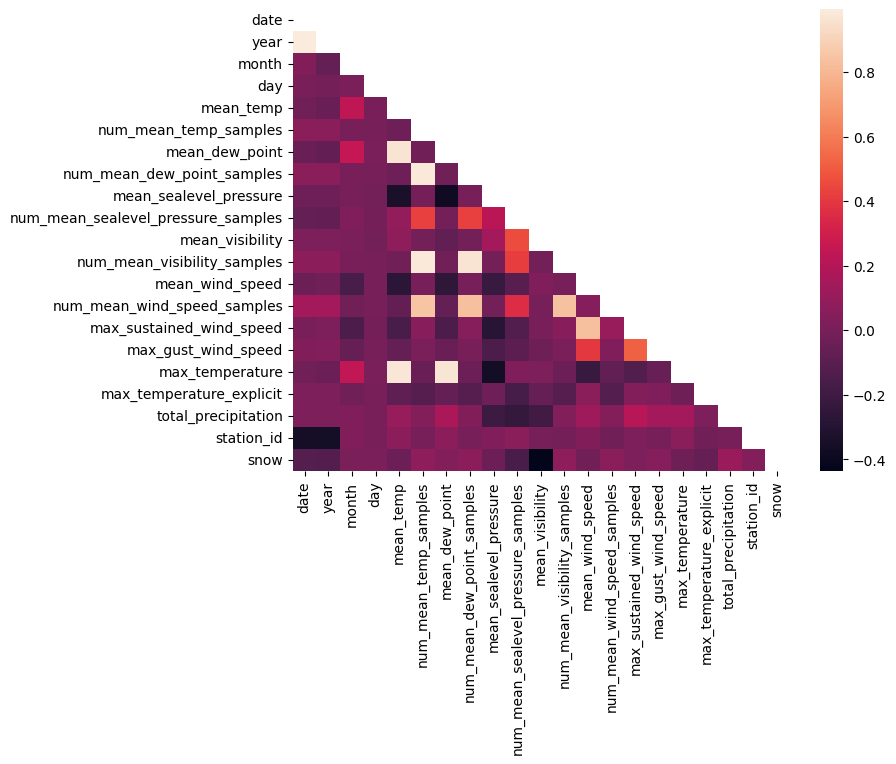

In [184]:
# Heatmap for correlation
get_corr_heatmap()

- `mean_temp` is highly correlated to `mean_dew_point` and `max_temperature`. 
- `num_mean_temp_samples` is highly correlated to all other `num_samples`. 
- `mean_wind_speed` is correlated to `max_gust_wind_speed` and `max_sustained_wind`

I only keep the columns `mean_temp`, `num_mean_temp_samples` and `mean_wind_speed`.

In [187]:
# Columns to drop
cols_to_drop = ['mean_dew_point', 'max_temperature', 'max_gust_wind_speed', 'max_sustained_wind_speed', 
                'num_mean_dew_point_samples', 'num_mean_wind_speed_samples', 'num_mean_visibility_samples', 'num_mean_sealevel_pressure_samples']

# Drop the columns
snow_df = snow_df.drop(columns=cols_to_drop)                

In [190]:
# Checking for existing columns
snow_df.columns

Index(['date', 'year', 'month', 'day', 'mean_temp', 'num_mean_temp_samples',
       'mean_sealevel_pressure', 'mean_visibility', 'mean_wind_speed',
       'max_temperature_explicit', 'total_precipitation', 'station_id',
       'snow'],
      dtype='object')

My intution is snowfall is highly seasonal and it occurs the most in winter month. I want to verify this first. If this seasonal trend is evident, I will introduce features that capture the cyclic nature of the calendar, such as sine and cosine transformations of the month variable.

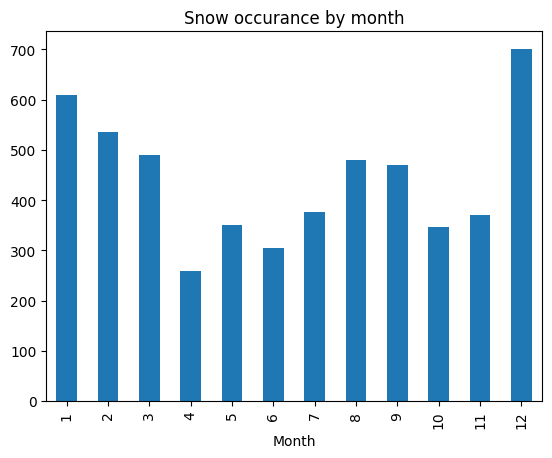

In [199]:
snow_df.groupby('month')['snow'].sum().plot(kind='bar')
plt.title('Snow occurance by month')
plt.xlabel('Month')
plt.show()

Winter month witness highest snowfall. I add two new columns to encode this seasonality of the month. 

In [200]:
# Encode month as cyclic continuous feature
snow_df['month_sin'] = np.sin(2 * np.pi * snow_df['month']/12)
snow_df['month_cos'] = np.cos(2 * np.pi * snow_df['month']/12)

In [202]:
# Drop the original month column to avoid redundancy
snow_df = snow_df.drop(columns='month')

In [204]:
# Print first few rows
snow_df.head()

,date,year,day,mean_temp,num_mean_temp_samples,mean_sealevel_pressure,mean_visibility,mean_wind_speed,max_temperature_explicit,total_precipitation,station_id,snow,month_sin,month_cos
2953,2000-11-09,2000,9,40.299999,24,1005.299988,5.8,9.3,0,0.07,725300_94846,1,-0.500000,8.660254e-01
30937,2008-08-20,2008,20,73.099998,24,1020.200012,9.8,6.8,0,0.00,725300_94846,0,-0.866025,-5.000000e-01
15531,2004-05-03,2004,3,42.700001,24,1021.900024,10.0,5.4,0,0.00,725300_94846,0,0.500000,-8.660254e-01
25807,2007-03-18,2007,18,33.099998,20,1024.500000,10.0,3.7,1,0.00,725300_94846,0,1.000000,6.123234e-17
9474,2002-09-03,2002,3,76.199997,24,1013.000000,9.7,8.9,0,0.00,725300_94846,0,-1.000000,-1.836970e-16


Since weather data mostly follows trends within a timeframe of a couple of days, I would check for autocorrelation at different lags, especially for mean temperature, visibility, wind speed etc. I woull plot an ACF and identify the relevant lags to include in the modelling. Due to a lack of time, I will skip this part.
Instead, I will only consider whether it snowed in the past day at each station, by adding a new column representing the lag of the target.

In [212]:
# Create a new column indicating whether it snowed at a given station in the previous day
# Each row only sees the previous entry, thus avoiding any data leakage
snow_df['snowed_previous_day'] = snow_df.sort_values(['date', 'station_id'])['snow'].shift().fillna(0) # to fill the only missing entry with 0

# Print first few rows
snow_df.head()

,date,year,day,mean_temp,num_mean_temp_samples,mean_sealevel_pressure,mean_visibility,mean_wind_speed,max_temperature_explicit,total_precipitation,station_id,snow,month_sin,month_cos,snowed_previous_day
2953,2000-11-09,2000,9,40.299999,24,1005.299988,5.8,9.3,0,0.07,725300_94846,1,-0.500000,8.660254e-01,0.0
30937,2008-08-20,2008,20,73.099998,24,1020.200012,9.8,6.8,0,0.00,725300_94846,0,-0.866025,-5.000000e-01,0.0
15531,2004-05-03,2004,3,42.700001,24,1021.900024,10.0,5.4,0,0.00,725300_94846,0,0.500000,-8.660254e-01,0.0
25807,2007-03-18,2007,18,33.099998,20,1024.500000,10.0,3.7,1,0.00,725300_94846,0,1.000000,6.123234e-17,0.0
9474,2002-09-03,2002,3,76.199997,24,1013.000000,9.7,8.9,0,0.00,725300_94846,0,-1.000000,-1.836970e-16,1.0


Lastly, before modeling, I create dummy variables for the station ids to prevent the model from making any assumptions about ordering or linear relationships between station ids.

In [219]:
# Create dummy varibales for station_ids
snow_df = pd.get_dummies(snow_df, columns=['station_id'], prefix='station', drop_first=True) # drop the first one to avoid linear dependency

In [220]:
# Checking for columns
snow_df.columns

Index(['date', 'year', 'day', 'mean_temp', 'num_mean_temp_samples',
       'mean_sealevel_pressure', 'mean_visibility', 'mean_wind_speed',
       'max_temperature_explicit', 'total_precipitation', 'snow', 'month_sin',
       'month_cos', 'snowed_previous_day', 'station_725305_94892',
       'station_725305_99999', 'station_725314_3960', 'station_725314_99999',
       'station_725315_94870', 'station_725315_99999', 'station_725316_3887',
       'station_725316_99999', 'station_725317_53802', 'station_725317_99999',
       'station_725320_14842', 'station_725326_4894', 'station_725326_99999',
       'station_725327_4846', 'station_725327_99999', 'station_725330_14827'],
      dtype='object')

#### Modelling

Now we come to the modelling part. First I will split the data into train, validation and test. Then create features and target variables, scale them if necessary. I will use the classification model Logistic Regression for snow prediction.

Now it's the time to split the data into train, validation and test

In [210]:
# The date on which the prediction needs to be made.
pred_date = str(dt.datetime.today()- dt.timedelta(days=20*365)).split(' ')[0]

I will only select the records that are before pred_date. Records with a date equal to pred_date will constitute the test set. The remaining data will be split into 80% for training and 20% for validation.

In [234]:
# Create a new dataframe that only contains dates before pred_date
df_modelling = snow_df[snow_df['date'] < pred_date].sort_values('date')

# Check if we have enough data for training
df_len = len(df_modelling)
print(df_len)

# 20% of len(df_modelling)
val_size = df_len * 0.2
print(val_size)

19312
3862.4


In [275]:
# Create a dataframe containing records for model validation
df_val = df_modelling[df_modelling['date'] > '2004-04-25'] # Roughly 3860 dataponts for validation

# Print first few rows
display(df_val.head())

# Create validation features and target
val_features = df_val.drop(columns=['snow', 'date']) # Also droping date column as it is a datetime object 
                                                            # and we have already have year, month and day columns
val_target = df_val['snow']


,date,year,day,mean_temp,num_mean_temp_samples,mean_sealevel_pressure,mean_visibility,mean_wind_speed,max_temperature_explicit,total_precipitation,...,station_725316_3887,station_725316_99999,station_725317_53802,station_725317_99999,station_725320_14842,station_725326_4894,station_725326_99999,station_725327_4846,station_725327_99999,station_725330_14827
15460,2004-04-26,2004,26,54.500000,23,1017.900024,10.0,8.6,0,0.00,...,False,True,False,False,False,False,False,False,False,False
15461,2004-04-26,2004,26,55.599998,24,1017.599976,10.0,9.3,1,0.00,...,False,False,False,True,False,False,False,False,False,False
15459,2004-04-26,2004,26,50.599998,24,1014.500000,9.4,12.2,0,0.00,...,False,False,False,False,False,False,False,False,False,False
15464,2004-04-26,2004,26,54.000000,24,1014.700012,9.1,13.9,0,0.01,...,False,False,False,False,False,False,False,False,False,True
15462,2004-04-26,2004,26,50.799999,24,1015.299988,8.6,13.3,1,0.00,...,False,False,False,False,False,False,False,False,True,False


In [263]:
# Create a dataframe containing records for model training
df_train = df_modelling[df_modelling['date'] <= '2004-04-25'] 

# Print first few rows
display(df_train.head())

# Print last few rows
display(df_train.tail())

# Create validation features and target
train_features = df_train.drop(columns=['snow', 'date'])
train_target = df_train['snow']

,date,year,day,mean_temp,num_mean_temp_samples,mean_sealevel_pressure,mean_visibility,mean_wind_speed,max_temperature_explicit,total_precipitation,...,station_725316_3887,station_725316_99999,station_725317_53802,station_725317_99999,station_725320_14842,station_725326_4894,station_725326_99999,station_725327_4846,station_725327_99999,station_725330_14827
2,2000-01-01,2000,1,35.599998,24,1019.200012,9.5,5.7,0,0.0,...,False,False,False,False,False,False,False,False,False,True
3,2000-01-01,2000,1,40.000000,23,1005.000000,13.2,7.9,1,0.0,...,False,True,False,False,False,False,False,False,False,False
5,2000-01-01,2000,1,36.000000,24,1015.500000,8.6,7.2,0,0.0,...,False,False,False,False,False,False,False,False,False,False
7,2000-01-01,2000,1,42.299999,24,1017.400024,9.3,7.2,1,0.0,...,False,False,False,True,False,False,False,False,False,False
1,2000-01-01,2000,1,36.799999,23,1012.099976,10.0,2.7,1,0.0,...,False,False,False,False,False,False,True,False,False,False


,date,year,day,mean_temp,num_mean_temp_samples,mean_sealevel_pressure,mean_visibility,mean_wind_speed,max_temperature_explicit,total_precipitation,...,station_725316_3887,station_725316_99999,station_725317_53802,station_725317_99999,station_725320_14842,station_725326_4894,station_725326_99999,station_725327_4846,station_725327_99999,station_725330_14827
15450,2004-04-25,2004,25,57.900002,24,1013.099976,8.4,15.5,0,0.09,...,False,False,False,False,False,False,False,False,False,True
15453,2004-04-25,2004,25,58.400002,24,1012.099976,7.9,15.4,0,0.28,...,False,False,False,False,False,False,False,False,False,False
15452,2004-04-25,2004,25,54.900002,24,1011.500000,6.2,11.1,0,1.23,...,False,False,False,False,True,False,False,False,False,False
15451,2004-04-25,2004,25,58.200001,24,1012.400024,8.8,14.2,0,0.42,...,False,True,False,False,False,False,False,False,False,False
15448,2004-04-25,2004,25,60.500000,24,1014.299988,8.2,8.3,1,0.86,...,False,False,False,False,False,False,False,False,False,False


In [255]:
# Create a dataframe that only contains records for pred_date
df_test =  snow_df[snow_df['date'] == pred_date]

# Print first few rows
display(df_test)

# Create test features and target
test_features = df_test.drop(columns=['snow', 'date'])
test_target = df_test['snow']

,date,year,day,mean_temp,num_mean_temp_samples,mean_sealevel_pressure,mean_visibility,mean_wind_speed,max_temperature_explicit,total_precipitation,...,station_725316_3887,station_725316_99999,station_725317_53802,station_725317_99999,station_725320_14842,station_725326_4894,station_725326_99999,station_725327_4846,station_725327_99999,station_725330_14827
19317,2005-05-21,2005,21,59.400002,24,1017.099976,9.9,4.3,1,0.00,...,False,False,False,False,False,False,False,False,False,False
19314,2005-05-21,2005,21,58.599998,24,1016.900024,10.0,4.4,1,0.00,...,False,False,False,False,False,False,False,False,False,False
19316,2005-05-21,2005,21,64.500000,24,1015.500000,6.3,4.1,1,0.00,...,False,False,False,False,False,False,False,False,False,False
19322,2005-05-21,2005,21,61.200001,24,1016.400024,9.0,7.0,1,0.00,...,False,False,False,False,False,False,False,False,False,False
19319,2005-05-21,2005,21,59.900002,21,1016.099976,6.7,6.2,0,0.01,...,False,True,False,False,False,False,False,False,False,False
19321,2005-05-21,2005,21,62.099998,24,1015.599976,6.7,4.3,1,0.00,...,False,False,False,True,False,False,False,False,False,False
19313,2005-05-21,2005,21,61.200001,24,1016.700012,8.5,4.7,0,0.00,...,False,False,False,False,True,False,False,False,False,False
19320,2005-05-21,2005,21,59.000000,24,1012.099976,7.2,3.7,0,0.00,...,False,False,False,False,False,False,True,False,False,False
19315,2005-05-21,2005,21,59.099998,24,1017.400024,10.0,3.0,0,0.00,...,False,False,False,False,False,False,False,False,True,False
19318,2005-05-21,2005,21,59.500000,24,1017.099976,9.8,4.4,0,0.00,...,False,False,False,False,False,False,False,False,False,True


I now want to scale only the columns containing continuous numerical values.

In [274]:
# Import StandardScaler
from sklearn.preprocessing import StandardScaler

# Columns to be scaled
cols_to_standardise = ['mean_temp', 'num_mean_temp_samples', 'mean_sealevel_pressure', 'mean_visibility', 'mean_wind_speed', 'total_precipitation']

# Initialise the StandardScaler 
scaler = StandardScaler()

# Scale the columns
train_features_scaled_part = scaler.fit_transform(train_features[cols_to_standardise])

# Replace original columns with scaled ones
train_features_scaled = train_features.copy()
train_features_scaled[cols_to_standardise] = train_features_scaled_part

train_features_scaled = train_features_scaled.values

In [276]:
# Scale the columns in df_val
val_features_scaled_part = scaler.transform(val_features[cols_to_standardise])

# Replace original columns with scaled ones
val_features_scaled = val_features.copy()
val_features_scaled[cols_to_standardise] = val_features_scaled_part

val_features_scaled = val_features_scaled.values

In [281]:
# Scale the columns in df_test
test_features_scaled_part = scaler.transform(test_features[cols_to_standardise])

# Replace original columns with scaled ones
test_features_scaled = test_features.copy()
test_features_scaled[cols_to_standardise] = test_features_scaled_part

test_features_scaled = test_features_scaled.values

In [270]:
# Import the and initialise the model
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter=10000) # had to increase max_iter for convergence
   
# Fit the model   
logreg.fit(train_features_scaled, train_target)

LogisticRegression(max_iter=10000)

In [277]:
# Predict values for validation set
val_pred = logreg.predict(val_features_scaled)

In [278]:
# Evaluating the metrics
from sklearn.metrics import classification_report

print(classification_report(val_target, val_pred))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91      3288
           1       0.49      0.49      0.49       570

    accuracy                           0.85      3858
   macro avg       0.70      0.70      0.70      3858
weighted avg       0.85      0.85      0.85      3858



In [279]:
# Calculate the f1-score
from sklearn.metrics import f1_score

print(f1_score(val_target, val_pred))

0.48912097476066146


In [286]:
# Calculate the train score
# Predict values for train set
train_pred = logreg.predict(train_features_scaled)
print(f1_score(train_target, train_pred))

0.7559024390243902


In [284]:
# Predict values for test set
test_pred = logreg.predict(test_features_scaled)

In [285]:
# Calculate the f1-score
print(f1_score(test_target, test_pred))

0.6666666666666666


### Conclusion

I used a Logistic Regression model for the snow prediction and evaluated model perfoemance using the F1-score (due imbalanced classes). The model achieved an F1-score of 0.75 on the training set but only 0.44 on the validation set, suggesting overfitting. 

Possible reasons for overfitting
- Imbalanced data (Number of snowed days are significantely greater than days snowed days without)
- Existence of noise (I did not remove the outliers)

The model achieved a modest score of 0.66 on the test set, indicating room for improvement.

Scope of Improvement
- Feature engineering: Features to caputer trend and seasonality, for example lagged versions of temperature.
- Hyperparameter tuning to avoid overfitting: For instance inclusing regularisation strength.
- Noise removal and proper scaling.
- KFold Cross-validation to get more reliable evaluation metrics.
- Model complexity: Could have tried more advanced models like RandomForest, GradientBoosting etc.